In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
BATCH_SIZE = 128
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 100

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/butterfly-images40-species/train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 12639 files belonging to 100 classes.


2022-11-07 06:02:13.811168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 06:02:13.901556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 06:02:13.902315: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 06:02:13.907537: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"../input/butterfly-images40-species/valid",
shuffle = True,
image_size = (IMAGE_SIZE, IMAGE_SIZE))

Found 500 files belonging to 100 classes.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"../input/butterfly-images40-species/test",
shuffle = True,
image_size = (IMAGE_SIZE, IMAGE_SIZE))

Found 500 files belonging to 100 classes.


In [6]:
class_names = train_ds.class_names
class_names

['ADONIS',
 'AFRICAN GIANT SWALLOWTAIL',
 'AMERICAN SNOOT',
 'AN 88',
 'APPOLLO',
 'ARCIGERA FLOWER MOTH',
 'ATALA',
 'ATLAS MOTH',
 'BANDED ORANGE HELICONIAN',
 'BANDED PEACOCK',
 'BANDED TIGER MOTH',
 'BECKERS WHITE',
 'BIRD CHERRY ERMINE MOTH',
 'BLACK HAIRSTREAK',
 'BLUE MORPHO',
 'BLUE SPOTTED CROW',
 'BROOKES BIRDWING',
 'BROWN ARGUS',
 'BROWN SIPROETA',
 'CABBAGE WHITE',
 'CAIRNS BIRDWING',
 'CHALK HILL BLUE',
 'CHECQUERED SKIPPER',
 'CHESTNUT',
 'CINNABAR MOTH',
 'CLEARWING MOTH',
 'CLEOPATRA',
 'CLODIUS PARNASSIAN',
 'CLOUDED SULPHUR',
 'COMET MOTH',
 'COMMON BANDED AWL',
 'COMMON WOOD-NYMPH',
 'COPPER TAIL',
 'CRECENT',
 'CRIMSON PATCH',
 'DANAID EGGFLY',
 'EASTERN COMA',
 'EASTERN DAPPLE WHITE',
 'EASTERN PINE ELFIN',
 'ELBOWED PIERROT',
 'EMPEROR GUM MOTH',
 'GARDEN TIGER MOTH',
 'GIANT LEOPARD MOTH',
 'GLITTERING SAPPHIRE',
 'GOLD BANDED',
 'GREAT EGGFLY',
 'GREAT JAY',
 'GREEN CELLED CATTLEHEART',
 'GREEN HAIRSTREAK',
 'GREY HAIRSTREAK',
 'HERCULES MOTH',
 'HUMMING BIRD H

2022-11-07 06:02:17.274752: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(128, 224, 224, 3)
[ 1 41 30 96  7 34 26 35 83 82 13 71  3 45 60 55 62 19 97 79 43 38  0  1
 68 40 63 37 76 96 65 22 80 68 65 91 67 58 31 24 13 23 74 27 78 14 89 64
 34 84 57 66 19 71 53 57 61 57 64 96 24 80 15 86 86 57 26 92  5 47 53 45
 72 34 46 65 67 32 42 96 22 89 53 65 30 18 16 79  8 32 83 95 63 60 23 13
 45 30 63 50 91 73 59 97 75  2 26 21 67 43 43 60 83 43 19 10 52 16 54 51
 37 89 90 83 17 59 34 90]


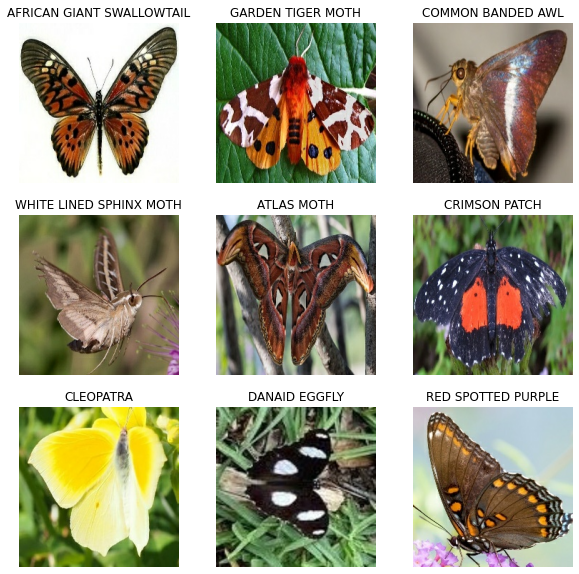

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(0,9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(train_ds)

99

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [11]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2)
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 100

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (128, 224, 224, 3)        0         
_________________________________________________________________
sequential_1 (Sequential)    (128, 224, 224, 3)        0         
_________________________________________________________________
conv2d (Conv2D)              (128, 222, 222, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (128, 111, 111, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (128, 109, 109, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (128, 54, 54, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (128, 52, 52, 64)        

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/100


2022-11-07 06:02:34.122409: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 26 of 1000
2022-11-07 06:02:44.318824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 53 of 1000
2022-11-07 06:02:54.330578: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 80 of 1000
2022-11-07 06:02:58.628273: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2022-11-07 06:02:59.459501: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


99/99 [==============================] - 57s 139ms/step - loss: 4.5435 - accuracy: 0.0155 - val_loss: 4.3350 - val_accuracy: 0.0160
Epoch 2/100
99/99 [==============================] - 11s 107ms/step - loss: 4.2427 - accuracy: 0.0258 - val_loss: 4.0923 - val_accuracy: 0.0260
Epoch 3/100
99/99 [==============================] - 11s 107ms/step - loss: 3.9966 - accuracy: 0.0511 - val_loss: 3.9022 - val_accuracy: 0.0460
Epoch 4/100
99/99 [==============================] - 11s 107ms/step - loss: 3.7008 - accuracy: 0.0697 - val_loss: 3.5939 - val_accuracy: 0.0860
Epoch 5/100
99/99 [==============================] - 11s 107ms/step - loss: 3.5280 - accuracy: 0.0825 - val_loss: 3.3498 - val_accuracy: 0.1020
Epoch 6/100
99/99 [==============================] - 11s 107ms/step - loss: 3.3433 - accuracy: 0.1196 - val_loss: 3.1118 - val_accuracy: 0.1680
Epoch 7/100
99/99 [==============================] - 11s 107ms/step - loss: 3.0836 - accuracy: 0.1595 - val_loss: 2.8853 - val_accuracy: 0.1840
Epoc

In [16]:
scores = model.evaluate(test_ds)

16/16 [==============================] - 2s 11ms/step - loss: 0.6370 - accuracy: 0.8200


In [17]:
scores

[0.6369526386260986, 0.8199999928474426]

In [18]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 99}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
history.history["loss"]

[4.543463706970215,
 4.24273681640625,
 3.996607780456543,
 3.700814962387085,
 3.527958869934082,
 3.3433048725128174,
 3.0835585594177246,
 2.9052469730377197,
 2.794034957885742,
 2.6469876766204834,
 2.5541577339172363,
 2.4732437133789062,
 2.389162302017212,
 2.2563588619232178,
 2.1938822269439697,
 2.094237804412842,
 2.0037715435028076,
 1.9545472860336304,
 1.89177405834198,
 1.7703663110733032,
 1.7311854362487793,
 1.6742863655090332,
 1.6348439455032349,
 1.6029208898544312,
 1.5573625564575195,
 1.5000032186508179,
 1.421111822128296,
 1.4055267572402954,
 1.3982607126235962,
 1.3427201509475708,
 1.3432893753051758,
 1.2548643350601196,
 1.217058539390564,
 1.2318885326385498,
 1.193946123123169,
 1.1826930046081543,
 1.1476558446884155,
 1.129965901374817,
 1.0820512771606445,
 1.133074164390564,
 1.0504772663116455,
 1.0389362573623657,
 1.0325177907943726,
 1.018247365951538,
 0.9845202565193176,
 0.9832779765129089,
 0.976970374584198,
 0.9556809663772583,
 0.9587239

In [21]:
history.history["accuracy"]

[0.015507555566728115,
 0.025793179869651794,
 0.05111163854598999,
 0.06970488280057907,
 0.08252235502004623,
 0.11955060064792633,
 0.15950629115104675,
 0.19431917369365692,
 0.21686843037605286,
 0.24511432647705078,
 0.26481524109840393,
 0.29670068621635437,
 0.3151356875896454,
 0.34757497906684875,
 0.36450669169425964,
 0.3925943374633789,
 0.4150644838809967,
 0.4343698024749756,
 0.45051032304763794,
 0.47851887345314026,
 0.4943428933620453,
 0.5107998847961426,
 0.5248832702636719,
 0.5303425788879395,
 0.5425270795822144,
 0.5591423511505127,
 0.5793179869651794,
 0.5878629684448242,
 0.5903947949409485,
 0.6065353155136108,
 0.6050320267677307,
 0.6343856453895569,
 0.6394492983818054,
 0.6347812414169312,
 0.6419020295143127,
 0.6439591646194458,
 0.659150242805481,
 0.6598623394966125,
 0.6771105527877808,
 0.6603370308876038,
 0.6789302825927734,
 0.6900071501731873,
 0.6936466693878174,
 0.696494996547699,
 0.7002927660942078,
 0.7015586495399475,
 0.703853130340576

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

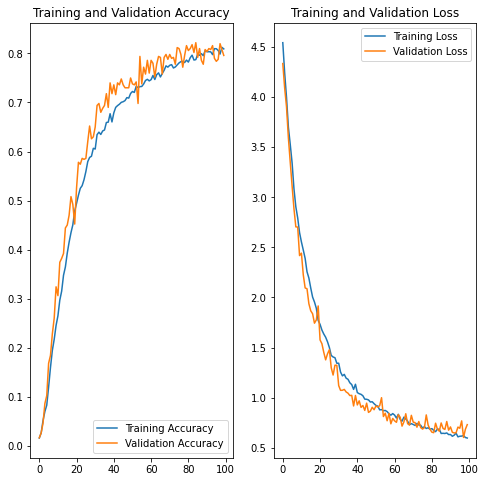

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()